In [188]:
#importing data management, data visualisation libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
data= pd.read_csv('KL_FE_data.csv')
data

,Location,Price,Bathrooms,Car Parks,Size,Furnishing,Type,No_of_Bedrooms,No_of_servant_rooms,studio_apartment,Property Type Supergroup,type,size_type
0,KLCC,1250000,3,2,1335.035,Fully Furnished,Built-up,2,1,0,Serviced Residence,Gold,Medium
1,Dutamas,1030000,4,2,1875.075,Partly Furnished,Built-up,3,0,0,Condominium,Silver,Large
2,Bukit Jalil,900000,3,2,1513.013,Partly Furnished,Built-up,4,1,0,Condominium,Silver,Large
3,Taman Tun Dr Ismail,5350000,5,4,7200.000,Partly Furnished,Land area,4,2,0,Bungalow,Deluxe,Extra Large
4,Taman Tun Dr Ismail,2600000,4,4,3600.000,Partly Furnished,Land area,5,0,0,Semi-detached House,Gold,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28985,Seputeh,750000,2,1,915.015,Partly Furnished,Built-up,3,0,0,Condominium,Silver,Small
28986,KL Sentral,1400000,3,2,1544.044,Fully Furnished,Land area,3,1,0,Condominium,Gold,Large
28987,KL Eco City,880000,1,1,650.050,Partly Furnished,Built-up,1,0,0,Condominium,Silver,Small
28988,Sri Hartamas,2700000,6,3,3973.073,Partly Furnished,Built-up,4,2,0,Condominium,Gold,Extra Large


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28990 entries, 0 to 28989
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  28990 non-null  object 
 1   Price                     28990 non-null  int64  
 2   Bathrooms                 28990 non-null  int64  
 3   Car Parks                 28990 non-null  int64  
 4   Size                      28990 non-null  float64
 5   Furnishing                28990 non-null  object 
 6   Type                      28990 non-null  object 
 7   No_of_Bedrooms            28990 non-null  int64  
 8   No_of_servant_rooms       28990 non-null  int64  
 9   studio_apartment          28990 non-null  int64  
 10  Property Type Supergroup  28990 non-null  object 
 11  type                      28990 non-null  object 
 12  size_type                 28990 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.9+ MB


Correlation Matrix:
                        Price  Bathrooms  Car Parks      Size  No_of_Bedrooms  \
Price                1.000000   0.606589   0.549862  0.004599        0.452021   
Bathrooms            0.606589   1.000000   0.648404  0.008893        0.766760   
Car Parks            0.549862   0.648404   1.000000  0.008281        0.618227   
Size                 0.004599   0.008893   0.008281  1.000000        0.008300   
No_of_Bedrooms       0.452021   0.766760   0.618227  0.008300        1.000000   
No_of_servant_rooms  0.298429   0.456383   0.282431  0.018700        0.144935   
studio_apartment    -0.042948  -0.128620  -0.078432 -0.001263       -0.259954   

                     No_of_servant_rooms  studio_apartment  
Price                           0.298429         -0.042948  
Bathrooms                       0.456383         -0.128620  
Car Parks                       0.282431         -0.078432  
Size                            0.018700         -0.001263  
No_of_Bedrooms            

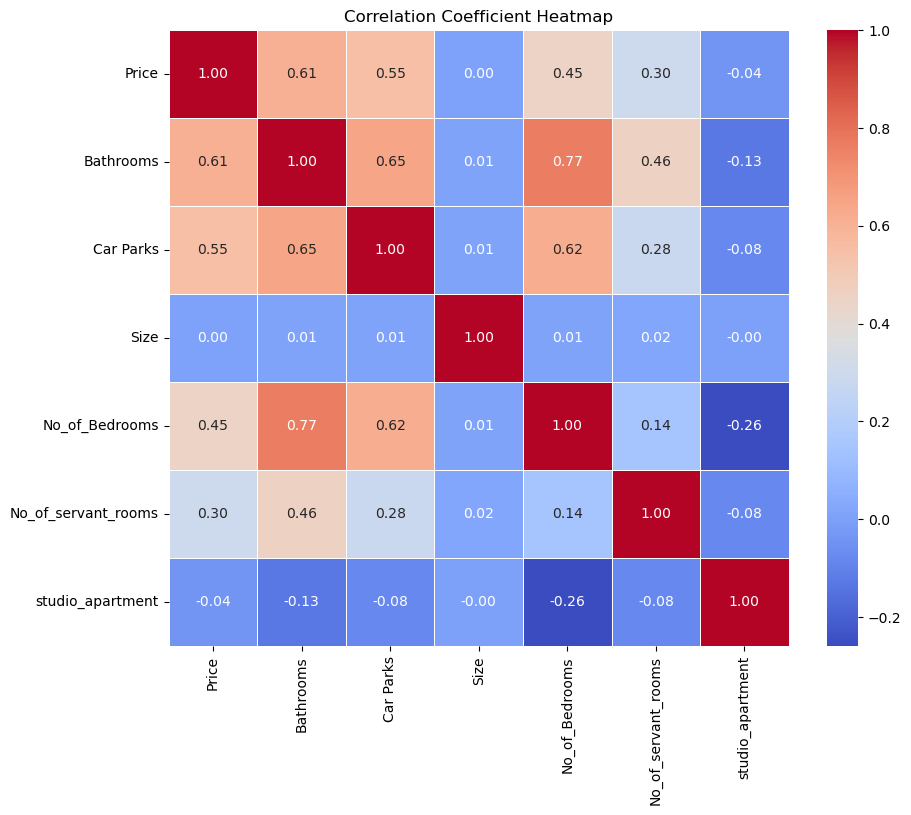

In [191]:
#Correlation matrix for numerical features

numerical_data = data[['Price', 'Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'No_of_servant_rooms', 'studio_apartment']]

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)


# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficient Heatmap')
plt.show()

Insights Bathrooms and bedrooms is highly correlated. Either we can have bathroom or bedrroms in our prediction
Studio_apartment has negative impact on prediction.
A correlation coefficient of 0 indicates no linear relationship. The feature that falls in no linear relationship is Size

In [192]:
# Linear Regression function

def regressionMethods(x, y, regressionObject):
  train_x, test_x, train_y, test_y= train_test_split(x,y,test_size=0.25, random_state=1)
  regressionObject.fit(train_x, train_y)
  predict_test=regressionObject.predict(test_x)
  rounded_predictions = [round(pred, 0) for pred in predict_test]
  columns = x.shape[1]
  df_m=pd.DataFrame({'features':columns,'coeff':regressionObject.coef_})
  df_m=df_m.sort_values(by=['coeff'])
  df_m.plot(x='features', y='coeff', kind='bar', figsize=(15,10))
  plt.show()
  
  print("RSquare Value for TEST data is : ",  np.round(regressionObject.score(test_x, test_y)*100, 0))
  print("RSquare Value for TRAIN data is : ", np.round(regressionObject.score(train_x, train_y)*100, 0))
  print("MSE for Test data is : ",np.round(metrics.mean_squared_error(test_y, rounded_predictions), 0))
  print("MAE for Test data is : ",np.round(metrics.mean_absolute_error(test_y, rounded_predictions), 0))
  print(rounded_predictions)


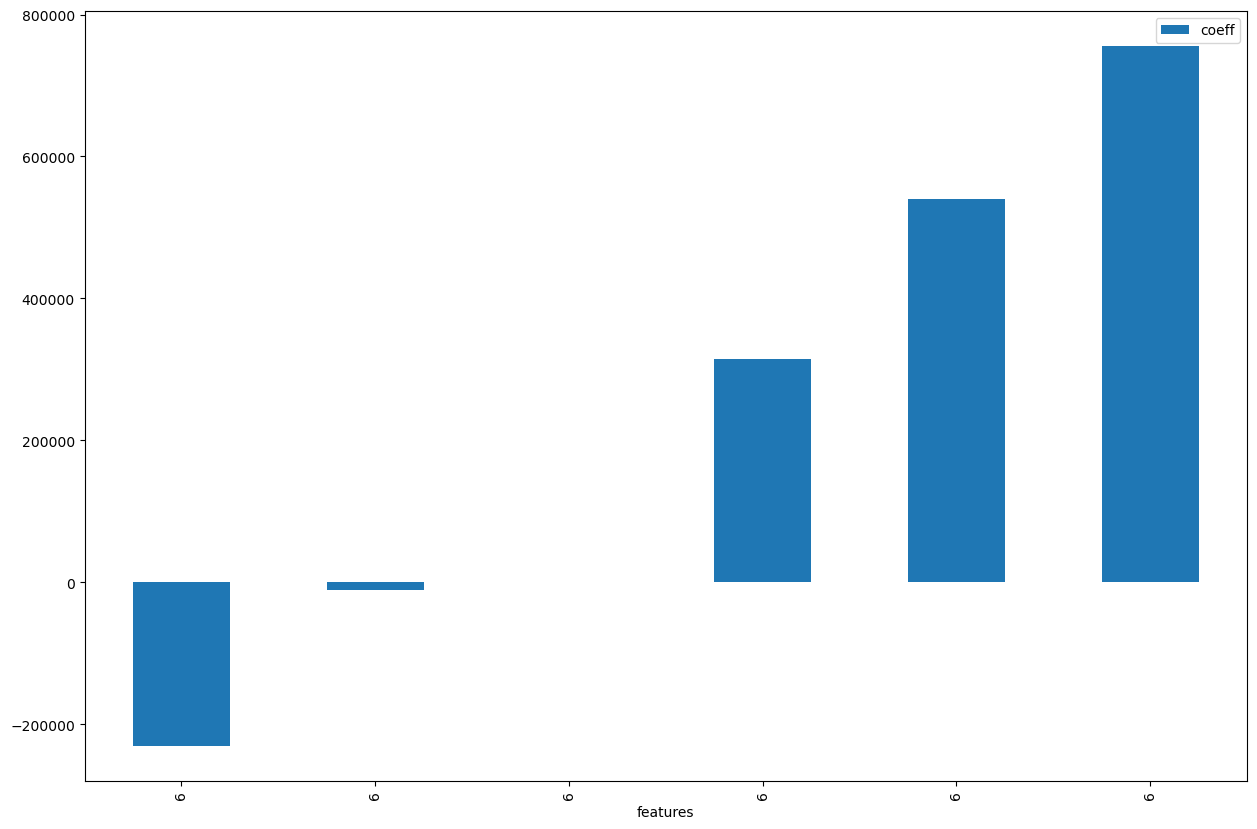

RSquare Value for TEST rounded data is :  0.4640116665131122
RSquare Value for TEST data is :  46.0
RSquare Value for TRAIN data is :  40.0
MSE for Test data is :  2347438901480.0
MAE for Test data is :  826898.0
[368236.0, 1433979.0, 368236.0, 1974362.0, 3475577.0, 1433979.0, 1722447.0, 1139204.0, 368235.0, 908618.0, 1139201.0, 908618.0, 1643238.0, 73464.0, 3475580.0, 1374747.0, 618804.0, 3471214.0, 908619.0, 2189919.0, 908618.0, 2409844.0, 3770361.0, 368235.0, 818747.0, 3659698.0, 908619.0, 598820.0, 368236.0, 818746.0, 2935206.0, 5622085.0, 368235.0, 1653901.0, 4011595.0, 4336430.0, 1433979.0, 897959.0, 1411733.0, 1433979.0, 1159188.0, 368236.0, 368236.0, 368236.0, 1438342.0, 1873827.0, 1653902.0, 829407.0, 2499709.0, 818747.0, 73464.0, 1124179.0, 2409837.0, 3565408.0, 908618.0, 1653900.0, 588162.0, 2409843.0, 908617.0, 368236.0, 588161.0, 383262.0, 4876804.0, 4771902.0, 588161.0, 9509635.0, 10096230.0, 2474023.0, 2704603.0, 73464.0, 1743777.0, 1139204.0, 137649.0, 368236.0, 598821.

In [355]:
#Regression model for all numerical features

from sklearn.linear_model import LinearRegression
import sklearn
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

X =  data[['Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'No_of_servant_rooms', 'studio_apartment']]
y = data['Price']

lm=LinearRegression()
regressionMethods(X, y, lm)

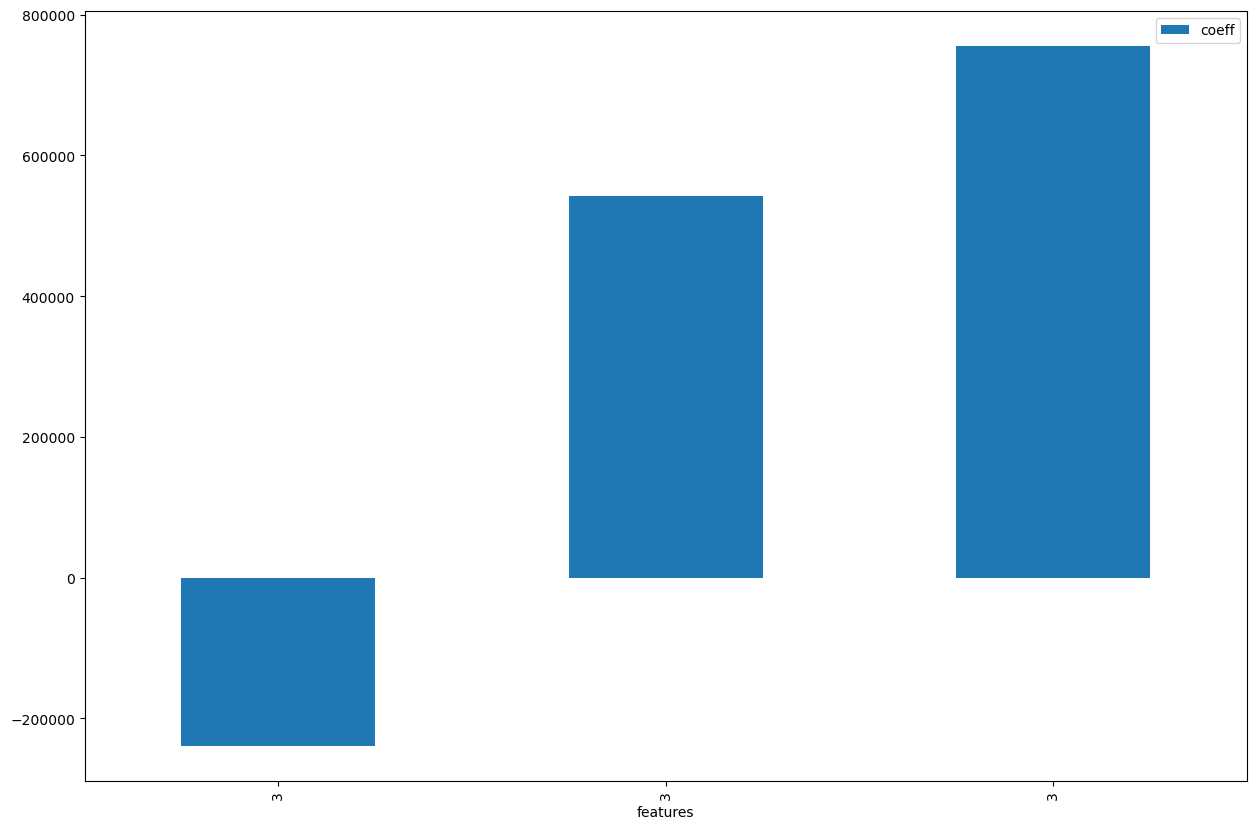

RSquare Value for TEST rounded data is :  0.4637107226383005
RSquare Value for TEST data is :  46.0
RSquare Value for TRAIN data is :  40.0
MSE for Test data is :  2348756928972.0
MAE for Test data is :  827404.0
[366466.0, 1425521.0, 366466.0, 1967913.0, 3479034.0, 1425521.0, 1729015.0, 1147756.0, 366466.0, 908858.0, 1147756.0, 908858.0, 1664419.0, 88701.0, 3479034.0, 1083160.0, 327599.0, 3453305.0, 908858.0, 2181081.0, 908858.0, 2419979.0, 3756799.0, 366466.0, 844262.0, 3633957.0, 908858.0, 605364.0, 366466.0, 844262.0, 2936642.0, 5622874.0, 366466.0, 1664419.0, 3995697.0, 4324921.0, 1425521.0, 908858.0, 1425521.0, 1425521.0, 869992.0, 366466.0, 366466.0, 366466.0, 1451251.0, 1903317.0, 1664419.0, 844262.0, 2484576.0, 844262.0, 88701.0, 1122027.0, 2419979.0, 3543631.0, 908858.0, 1664419.0, 605364.0, 2419979.0, 908858.0, 366466.0, 605364.0, 392196.0, 4867313.0, 4776987.0, 605364.0, 9509946.0, 10046532.0, 2458846.0, 2697744.0, 88701.0, 1729015.0, 1147756.0, 127568.0, 366466.0, 605364.0

In [356]:
#Regression model for highly correlated numerical features > 0.45

from sklearn.linear_model import LinearRegression
import sklearn
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

X =  data[['Bathrooms', 'Car Parks', 'No_of_Bedrooms']]
y = data['Price']

lm=LinearRegression()
regressionMethods(X, y, lm)

In [195]:
df = data.copy()

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28990 entries, 0 to 28989
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  28990 non-null  object 
 1   Price                     28990 non-null  int64  
 2   Bathrooms                 28990 non-null  int64  
 3   Car Parks                 28990 non-null  int64  
 4   Size                      28990 non-null  float64
 5   Furnishing                28990 non-null  object 
 6   Type                      28990 non-null  object 
 7   No_of_Bedrooms            28990 non-null  int64  
 8   No_of_servant_rooms       28990 non-null  int64  
 9   studio_apartment          28990 non-null  int64  
 10  Property Type Supergroup  28990 non-null  object 
 11  type                      28990 non-null  object 
 12  size_type                 28990 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.9+ MB


Location: 0.5417
Bathrooms: 0.6437
Car Parks: 0.4964
Size: 1.0465
Furnishing: 0.2576
Type: 0.0785
No_of_Bedrooms: 0.4134
No_of_servant_rooms: 0.2746
studio_apartment: 0.0049
Property Type Supergroup: 0.4823
type: 1.6627
size_type: 0.6274


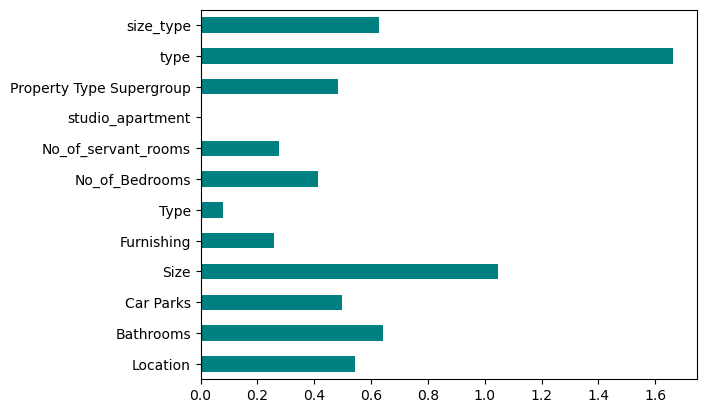

In [197]:
#Feature importance for predicting price

import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables with LabelEncoder
encoder = LabelEncoder()
df['Property Type Supergroup'] = encoder.fit_transform(df['Property Type Supergroup'])
df['Location'] = encoder.fit_transform(df['Location'])
df['Furnishing'] = encoder.fit_transform(df['Furnishing'])
df['Type'] = encoder.fit_transform(df['Type'])
df['type'] = encoder.fit_transform(df['type'])
df['size_type'] = encoder.fit_transform(df['size_type'])

# Separate features (X) and target variable (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Print feature importance scores
for feature, score in zip(X.columns, mi_scores):
    print(f"{feature}: {score:.4f}")


feat_importances = pd.Series(mi_scores, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh', color = 'teal')
plt.show()

Insights : 
Features with higher scores are considered more important, while those with lower scores are considered less important
1. type: 1.6627
2. Size: 1.0465
3. Bathrooms: 0.6437
4. size_type: 0.6274
5. Location: 0.5417
6. Car Parks: 0.4964

In [201]:
df.sample(2)

,Location,Price,Bathrooms,Car Parks,Size,Furnishing,Type,No_of_Bedrooms,No_of_servant_rooms,studio_apartment,Property Type Supergroup,type,size_type
19444,34,1970000,4,2,1830.030,1,0,4,1,0,3,2,1
9640,22,550000,2,1,785.085,1,0,2,0,0,7,0,3


Correlation Matrix:
                          Location     Price  Bathrooms  Car Parks      Size  \
Location                  1.000000 -0.093121  -0.016280  -0.010058 -0.005692   
Price                    -0.093121  1.000000   0.606589   0.549862  0.004599   
Bathrooms                -0.016280  0.606589   1.000000   0.648404  0.008893   
Car Parks                -0.010058  0.549862   0.648404   1.000000  0.008281   
Size                     -0.005692  0.004599   0.008893   0.008281  1.000000   
Furnishing                0.024764 -0.002602   0.075451   0.107907  0.001276   
Type                      0.002153  0.261297   0.365017   0.411357  0.009166   
No_of_Bedrooms            0.023849  0.452021   0.766760   0.618227  0.008300   
No_of_servant_rooms      -0.030351  0.298429   0.456383   0.282431  0.018700   
studio_apartment         -0.027127 -0.042948  -0.128620  -0.078432 -0.001263   
Property Type Supergroup  0.013832 -0.140857  -0.139759  -0.105287  0.000020   
type                

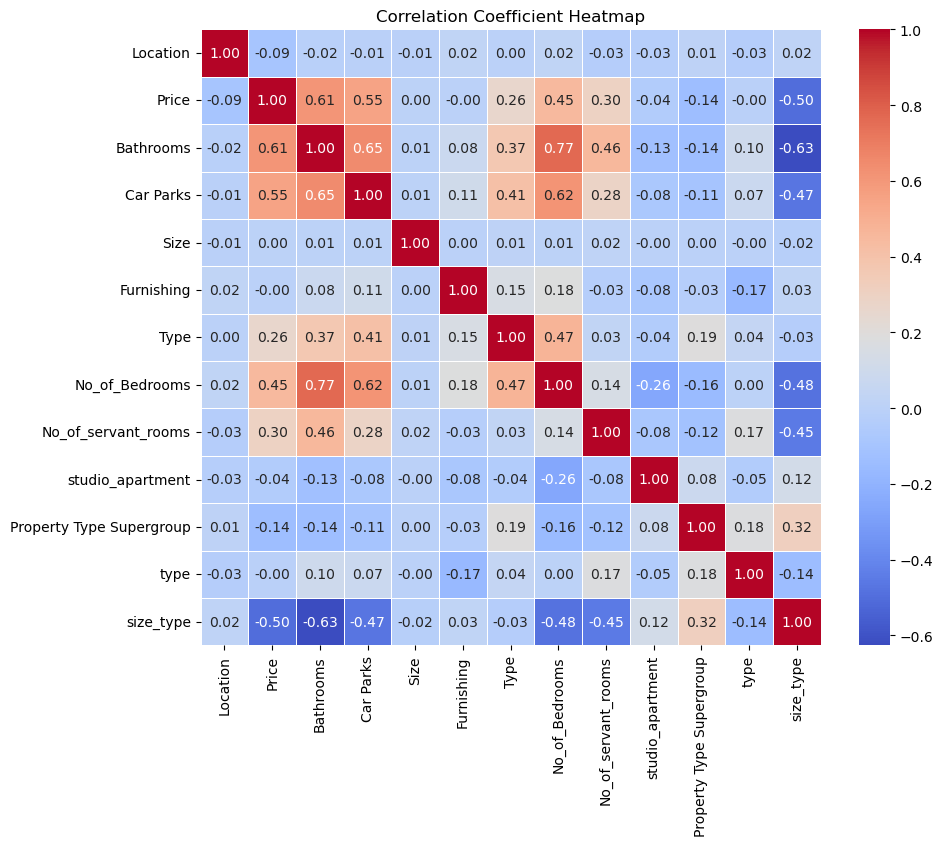

In [202]:
# Calculate correlation matrix for all feature after converting categorical parameters to numerical using label encoder
correlation_matrix_df = df.corr()

print("Correlation Matrix:")
print(correlation_matrix_df)


# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficient Heatmap')
plt.show()

In [263]:
#Normalizer: Scale the parameters using MinMax

from sklearn.preprocessing import MinMaxScaler


# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(X)

print("Original data:")
print(X)
print("\nScaled data:")
print(scaled_data)


Original data:
       Location  Bathrooms  Car Parks      Size  Furnishing  Type  \
0            29          3          2  1335.035           0     0   
1            20          4          2  1875.075           1     0   
2            10          3          2  1513.013           1     0   
3            54          5          4  7200.000           1     1   
4            54          4          4  3600.000           1     1   
...         ...        ...        ...       ...         ...   ...   
28985        44          2          1   915.015           1     0   
28986        28          3          2  1544.044           0     1   
28987        27          1          1   650.050           1     0   
28988        47          6          3  3973.073           1     0   
28989        45          2          3  1313.013           1     0   

       No_of_Bedrooms  No_of_servant_rooms  studio_apartment  \
0                   2                    1                 0   
1                   3       

Correlation Matrix:
                          Location     Price  Bathrooms  Car Parks      Size  \
Location                  1.000000 -0.093121  -0.016280  -0.010058 -0.005692   
Price                    -0.093121  1.000000   0.606589   0.549862  0.004599   
Bathrooms                -0.016280  0.606589   1.000000   0.648404  0.008893   
Car Parks                -0.010058  0.549862   0.648404   1.000000  0.008281   
Size                     -0.005692  0.004599   0.008893   0.008281  1.000000   
Furnishing                0.024764 -0.002602   0.075451   0.107907  0.001276   
Type                      0.002153  0.261297   0.365017   0.411357  0.009166   
No_of_Bedrooms            0.023849  0.452021   0.766760   0.618227  0.008300   
No_of_servant_rooms      -0.030351  0.298429   0.456383   0.282431  0.018700   
studio_apartment         -0.027127 -0.042948  -0.128620  -0.078432 -0.001263   
Property Type Supergroup  0.013832 -0.140857  -0.139759  -0.105287  0.000020   
type                

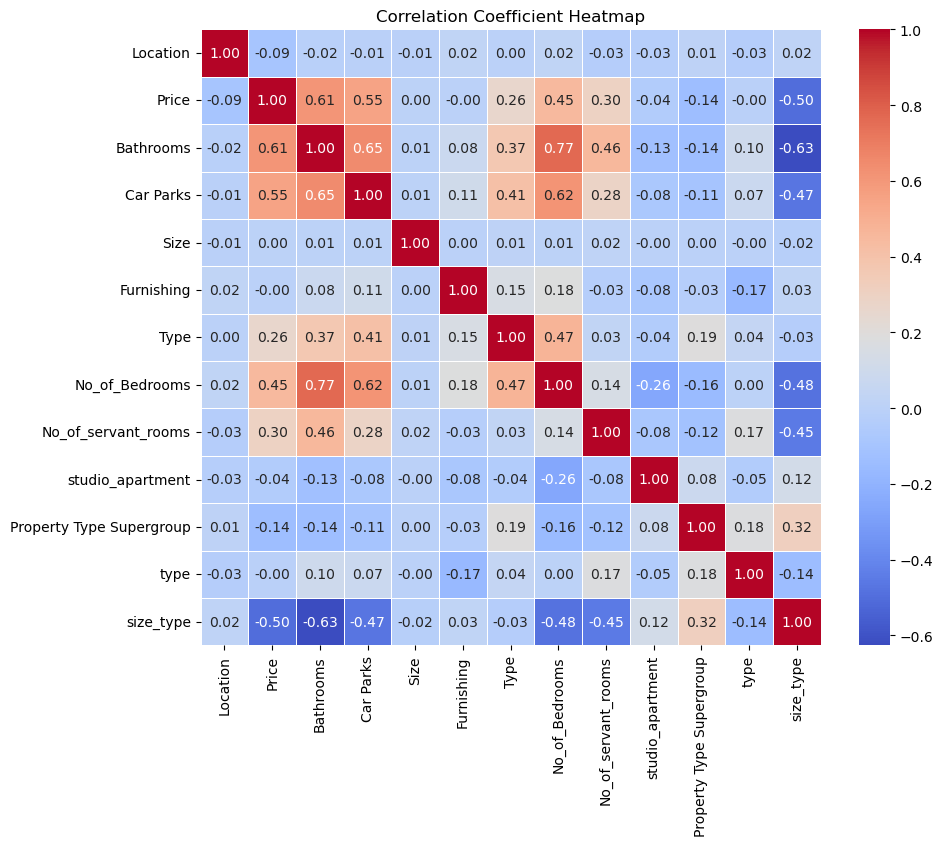

In [209]:
#Normalize using standard scalar and get correlation


from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix (a DataFrame)
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(df)

# Convert the normalized data back to a DataFrame (optional)
X_normalized_df = pd.DataFrame(X_normalized, columns=df.columns)

# Calculate correlation matrix
correlation_matrix_df = X_normalized_df.corr()

print("Correlation Matrix:")
print(correlation_matrix_df)


# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Coefficient Heatmap')
plt.show()

Insights : A correlation coefficient of 0 indicates no linear relationship b/w size , custom type, furnishing with price

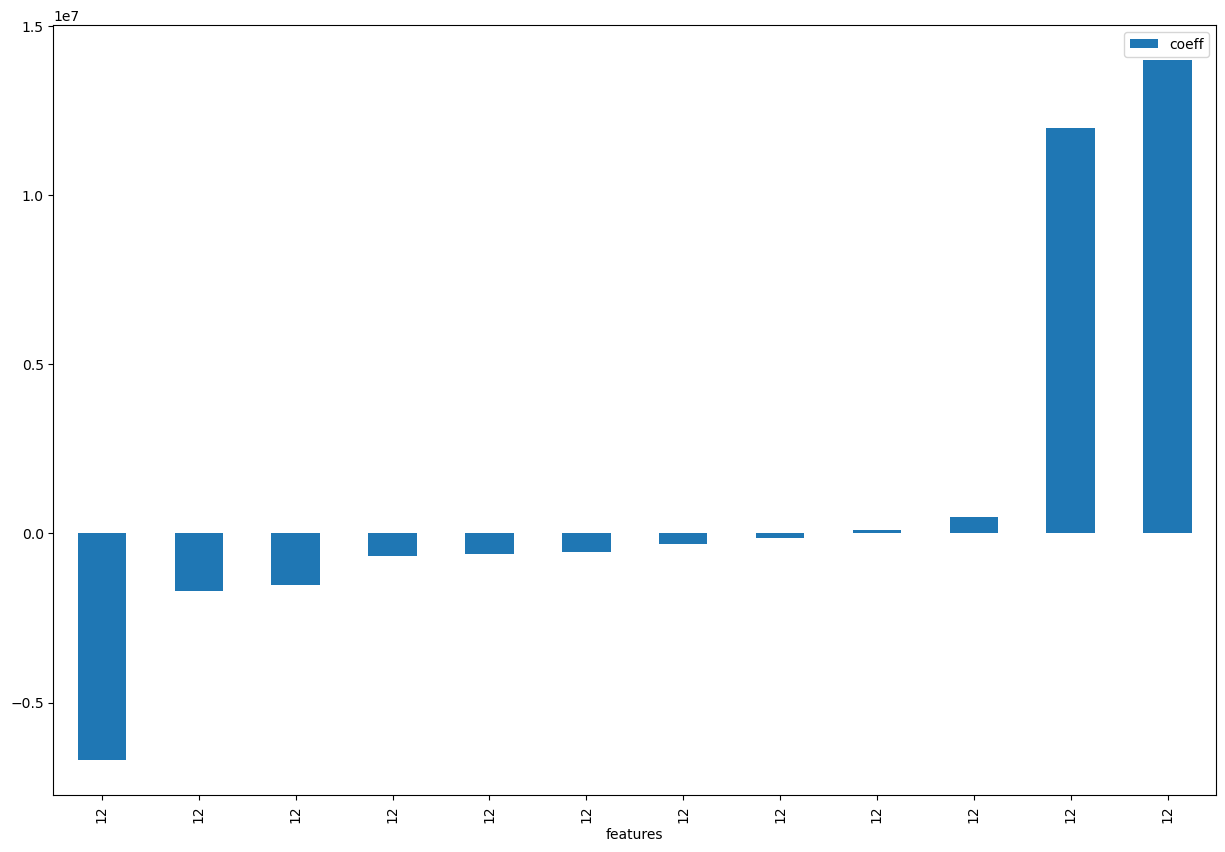

RSquare Value for TEST rounded data is :  0.5081410303559806
RSquare Value for TEST data is :  51.0
RSquare Value for TRAIN data is :  44.0
MSE for Test data is :  2154167930994.0
MAE for Test data is :  838033.0
[153632.0, 785759.0, 220946.0, 1653948.0, 4249935.0, 1089196.0, 2154622.0, 1736633.0, 598168.0, 1455177.0, 1869070.0, 792801.0, 1557977.0, -559900.0, 3136832.0, 804810.0, 139158.0, 3336245.0, 1907030.0, 2704388.0, 722825.0, 2636591.0, 2744813.0, 789544.0, 196082.0, 2879681.0, 757858.0, 1597083.0, -129070.0, 562310.0, 2448177.0, 5771901.0, 777408.0, 1400153.0, 4715271.0, 3562179.0, 790256.0, 457496.0, 2618222.0, 557969.0, 864519.0, 181712.0, 523531.0, 889411.0, 663765.0, 1169031.0, 722318.0, 1039810.0, 3298364.0, 908655.0, -23855.0, 1111061.0, 3059489.0, 4895855.0, 1417803.0, 1684132.0, -122744.0, 2861232.0, 1077444.0, 402157.0, 735183.0, 270093.0, 4802875.0, 5314907.0, 589827.0, 9819038.0, 9254228.0, 3176438.0, 3448477.0, 1165142.0, 1155882.0, 1572879.0, 1102826.0, 222917.0, 6

In [264]:
#Model prediction using scaled data -- all features

from sklearn.linear_model import LinearRegression
import sklearn
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

X = scaled_data
y = df['Price']

lm=LinearRegression()
regressionMethods(X, y, lm)


In [262]:
X = df.drop(columns=['Price'])
y = df['Price']

In [237]:
X.info()
X.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28990 entries, 0 to 28989
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Location                  28990 non-null  int64  
 1   Bathrooms                 28990 non-null  int64  
 2   Car Parks                 28990 non-null  int64  
 3   Size                      28990 non-null  float64
 4   Furnishing                28990 non-null  int64  
 5   Type                      28990 non-null  int64  
 6   No_of_Bedrooms            28990 non-null  int64  
 7   No_of_servant_rooms       28990 non-null  int64  
 8   studio_apartment          28990 non-null  int64  
 9   Property Type Supergroup  28990 non-null  int64  
 10  type                      28990 non-null  int64  
 11  size_type                 28990 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


Index(['Location', 'Bathrooms', 'Car Parks', 'Size', 'Furnishing', 'Type',
       'No_of_Bedrooms', 'No_of_servant_rooms', 'studio_apartment',
       'Property Type Supergroup', 'type', 'size_type'],
      dtype='object')

In [248]:
#Normalize using unit vector

from sklearn.preprocessing import Normalizer

scaler = Normalizer()
unit_scaled_data = scaler.fit_transform(X)

# Separate features (X) and target variable (y)
#[0:'Location', 1:'Bathrooms', 2:'Car Parks', 3:'Size', 4:'Furnishing', 5:'Type',
#6:'No_of_Bedrooms', 7:'No_of_servant_rooms', 8:'studio_apartment',
#9:'Property Type Supergroup', 10:'type', 11:'size_type']


#columns_to_keep = [0,1, 2, 3, 4,5,6,8,7,9,10,11]
columns_to_keep = [0,3,9]
X_normalized = unit_scaled_data[:, columns_to_keep]


# Splitting the data into train and test sets
train_x, test_x, train_y, test_y = train_test_split(X_normalized, y, test_size=0.25, random_state=1)

# Training the model
regressionObject = LinearRegression()
regressionObject.fit(train_x, train_y)

# Predicting on the test set
predict_test = regressionObject.predict(test_x)


# Calculating evaluation metrics
r_square_test = regressionObject.score(test_x, test_y)
r_square_train = regressionObject.score(train_x, train_y)
mse_test = metrics.mean_squared_error(test_y, predict_test)
mae_test = metrics.mean_absolute_error(test_y, predict_test)

# Printing the results
print("RSquare Value for TEST data is:", np.round(r_square_test * 100, 2))
print("RSquare Value for Train data is:", np.round(r_square_train * 100, 2))
print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

predict_test

RSquare Value for TEST data is: 1.87
RSquare Value for Train data is: 1.66
MSE for Test data is: 4297753471457.233
MAE for Test data is: 1187017.6328267867


array([1699688.16111878,  614751.1155675 , 1700672.91580262, ...,
       1170896.61249577, 1673986.48686073, 1632943.30250996])

In [78]:
X.columns

Index(['Location', 'Bathrooms', 'Car Parks', 'Size', 'Furnishing', 'Type',
       'No_of_Bedrooms', 'No_of_servant_rooms', 'studio_apartment',
       'Property Type Supergroup', 'type', 'size_type'],
      dtype='object')

In [85]:
X_2= X[['Location', 'Size']]
X_3= X[['Location', 'Size', 'Property Type Supergroup']]
X_4= X[['Location','Bathrooms', 'Size', 'Property Type Supergroup']]
X_5= X[['Location','Bathrooms', 'Size', 'Property Type Supergroup', 'No_of_Bedrooms']]
X_6= X[['Location','Bathrooms', 'Size', 'Property Type Supergroup', 'No_of_Bedrooms', 'Furnishing']]

In [231]:
#KNeighborsClassifier - scaled and without scaled data

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_feature_3, y, test_size=0.3, random_state=42)

# Without scaling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_no_scaling = r2_score(y_test, y_pred)
print("Accuracy without scaling:", accuracy_no_scaling)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_with_scaling = r2_score(y_test, y_pred_scaled)
print("Accuracy with scaling:", accuracy_with_scaling)

Accuracy without scaling: 0.4150494826825041
Accuracy with scaling: 0.48989110451758133


In [77]:
X.head()

,Location,Bathrooms,Car Parks,Size,Furnishing,Type,No_of_Bedrooms,No_of_servant_rooms,studio_apartment,Property Type Supergroup,type,size_type
0,29,3,2,1335.035,0,0,2,1,0,7,2,2
1,20,4,2,1875.075,1,0,3,0,0,3,3,1
2,10,3,2,1513.013,1,0,4,1,0,3,3,1
3,54,5,4,7200.000,1,1,4,2,0,1,1,0
4,54,4,4,3600.000,1,1,5,0,0,6,2,1


In [112]:
#Chi square selecting festures for k=3

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Select the top k features based on chi-squared test
k = 3  # Number of features to select
X_new = SelectKBest(chi2, k=k).fit_transform(X, y)
print("Selected features:", X.columns[SelectKBest(chi2, k=k).fit(X, y).get_support()].tolist())

Selected features: ['Location', 'Size', 'type']


In [215]:
X_3 = df[['Location', 'Size', 'type']]
X_7 = df[['Location', 'Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'Property Type Supergroup', 'type']]

In [227]:
#KNeighborsClassifier with scaling and with out scaling using feature techniques. 
#X_3 = df[['Location', 'Size', 'type']]

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



X_train, X_test, y_train, y_test = train_test_split(X_3, y, test_size=0.3, random_state=42)

# Without scaling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_no_scaling = r2_score(y_test, y_pred)
print("Accuracy without scaling:", accuracy_no_scaling)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_with_scaling = r2_score(y_test, y_pred_scaled)
print("Accuracy with scaling:", accuracy_with_scaling)

Accuracy without scaling: 0.4244766598911598
Accuracy with scaling: 0.5255062804161035


In [185]:
#Find all the combinations of features using chi-square

for k in range(2, X.shape[1] + 1):
    # Select the top k features based on chi-squared test
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X, y)
    
    print("Selected features from chi2:", X.columns[SelectKBest(chi2, k=k).fit(X, y).get_support()].tolist())

Selected features from chi2: ['Location', 'Size']
Selected features from chi2: ['Location', 'Size', 'type']
Selected features from chi2: ['Location', 'Bathrooms', 'Size', 'type']
Selected features from chi2: ['Location', 'Bathrooms', 'Car Parks', 'Size', 'type']
Selected features from chi2: ['Location', 'Bathrooms', 'Car Parks', 'Size', 'type', 'size_type']
Selected features from chi2: ['Location', 'Bathrooms', 'Car Parks', 'Size', 'Property Type Supergroup', 'type', 'size_type']
Selected features from chi2: ['Location', 'Bathrooms', 'Car Parks', 'Size', 'No_of_servant_rooms', 'Property Type Supergroup', 'type', 'size_type']
Selected features from chi2: ['Location', 'Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'No_of_servant_rooms', 'Property Type Supergroup', 'type', 'size_type']
Selected features from chi2: ['Location', 'Bathrooms', 'Car Parks', 'Size', 'Type', 'No_of_Bedrooms', 'No_of_servant_rooms', 'Property Type Supergroup', 'type', 'size_type']
Selected features from chi2

For each iteration, the output shows the selected features based on the chi-squared test. Here's what each line means:

Selected features from chi2:
This indicates that the features were selected using the chi-squared test.
['Location', 'Size']:
These are the selected features for this iteration. It means that, according to the chi-squared test, 'Location' and 'Size' are considered important or informative features.
['Location', 'Bathrooms', 'Size', 'type']:
This line indicates that in this iteration, 'Location', 'Bathrooms', 'Size', and 'type' were selected as important features based on the chi-squared test.
['Location', 'Bathrooms', 'Car Parks', 'Size', 'Furnishing', 'Type', 'No_of_Bedrooms', 'No_of_servant_rooms', 'studio_apartment', 'Property Type Supergroup', 'type', 'size_type']:
This line represents the final iteration, where a larger set of features is selected. It seems like the feature selection process iteratively adds more features based on the chi-squared test.
The feature selection process using the chi-squared test likely involves iterating over different combinations of features or thresholds to determine the most informative subset of features for the given task. Each iteration selects features that are deemed significant based on the chi-squared test's statistical significance.

In [161]:
#Feature selection using VarianceThreshold with threshold 5
from sklearn.feature_selection import VarianceThreshold

# Specify the threshold for variance
threshold = 5

# Select features with variance above the threshold
selector = VarianceThreshold(threshold=threshold)
X_new = selector.fit_transform(X, y)
print(X_new.shape)
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

(28990, 3)
Selected features: ['Location', 'Size', 'Property Type Supergroup']


In [164]:
#Feature selection using VarianceThreshold with different set of thresholds
thresholds = [1, 2, 3, 6]  # Example thresholds

# Loop through different variance thresholds
for threshold in thresholds:
    # Select features with variance above the threshold
    selector = VarianceThreshold(threshold=threshold)
    X_new = selector.fit_transform(X,y)
    
    # Get the indices of selected features
    selected_indices = selector.get_support(indices=True)
    
    # Get the names of selected features
    selected_features = [X.columns[i] for i in selected_indices]
    
    # Print the result
    print(f"Selected features for threshold={threshold}:", selected_features)

Selected features for threshold=1: ['Location', 'Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'Property Type Supergroup', 'type']
Selected features for threshold=2: ['Location', 'Bathrooms', 'Size', 'Property Type Supergroup']
Selected features for threshold=3: ['Location', 'Size', 'Property Type Supergroup']
Selected features for threshold=6: ['Location', 'Size']


Insights : 
1. Selected features for threshold=1:
All features have a variance greater than or equal to 1. Therefore, all features are selected: 'Location', 'Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'Property Type Supergroup', 'type'.
2. Selected features for threshold=2:
Features with a variance greater than or equal to 2 are selected: 'Location', 'Bathrooms', 'Size', 'Property Type Supergroup'.
3. Selected features for threshold=3:
Features with a variance greater than or equal to 3 are selected: 'Location', 'Size', 'Property Type Supergroup'.
4. Selected features for threshold=6:
Features with a variance greater than or equal to 6 are selected: 'Location', 'Size'.

In feature selection with variance thresholding, we set a threshold (1, 2, 3, and 6) and then select features whose variance is greater than or equal to that threshold. This process helps to remove features with low variance, which typically means they do not provide much information and may not be useful for modeling. The selected features are then used for further analysis or modeling. Adjusting the threshold value can lead to different sets of selected features, affecting the model's performance and complexity.

In [170]:
X_feature_7 = df[['Location', 'Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'Property Type Supergroup', 'type']]
X_feature_4 = df[['Location', 'Bathrooms', 'Size', 'Property Type Supergroup']]
X_feature_3 = df[['Location', 'Size', 'Property Type Supergroup']]
X_feature_2 = df[['Location', 'Size']]

In [296]:
#DecisionTreeClassifier with feature selected = 7 based on variance threshold > 1

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feature_7, y, test_size=0.3, random_state=42)

# Initialize the decision tree regressor
clf = DecisionTreeRegressor()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.5417819894903619


In [313]:
#RandomForestRegressor with feature selected = 7 based on correlation matrix

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_7, y, test_size=0.3, random_state=42)

# Initialize the Random Forest regressor
rf_classifier = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


R2 score: 0.6001571790228227


In [352]:
# RandomForestRegressor with feature selected = 3 based on variance threshold > 5 and test_size= 0.2
# No scaling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_feature_3, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Regressor
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)


R2 score: 0.7553319539526735


In [354]:
# RandomForestRegressor on normalised data for variance threshold > 3 (3 features selected)
# test size = 0.5 and StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


# X is dataframe
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(X_feature_3)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.5, random_state=1)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=1)

# Train the Regressor
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test)

# Calculate r2_score
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.7721608162696563


In [347]:
#RandomForestRegressor on normalised data for variance threshold > 2 (4 features selected) 
#and test_size = 0.5 and standard scalar

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# X is dataframe
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(X_feature_4)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.5, random_state=1)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=110, random_state=1)

# Train the Regressor
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test)

# Calculate r2_score
print("R2 score for test data:", r2_score(y_test, y_pred))


# Calculating evaluation metrics
mse_test = metrics.mean_squared_error(y_test, y_pred)
mae_test = metrics.mean_absolute_error(y_test, y_pred)

print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

R2 score for test data: 0.811418027304094
MSE for Test data is: 853825115466.4983
MAE for Test data is: 304010.8649888583


In [343]:
#RandomForestRegressor on normalised data for variance threshold > 1 (7 features selected) 
#and test_size = 0.2 and standard scalar
#features_7 = df[['Location', 'Bathrooms', 'Car Parks', 'Size', 'No_of_Bedrooms', 'Property Type Supergroup', 'type']]


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


# X is dataframe
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(X_feature_7)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=1)

# Train the Regressor
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test)

# Calculate r2_score
print("R2 score for test data:", r2_score(y_test, y_pred))


# Calculating evaluation metrics
mse_test = metrics.mean_squared_error(y_test, y_pred)
mae_test = metrics.mean_absolute_error(y_test, y_pred)

print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

df_new = pd.DataFrame()
df_new['Actual_Price'] = pd.DataFrame(y_test)
df_new['Predicted_Price'] = y_pred

df_new.sample(5)

R2 score for test data: 0.8685051357681878
MSE for Test data is: 532896690826.85425
MAE for Test data is: 220967.0078538202


,Actual_Price,Predicted_Price
19904,3117328,2.897348e+06
17549,650000,6.472676e+05
27553,6500000,7.148625e+06
14680,1250000,1.649280e+06
9536,950000,9.676139e+05


In [342]:
#RandomForestRegressor on normalised data for variance threshold > 5 (3 features selected) 
#and test_size = 0.2 and standard scalar
#feature_3 = df[['Location', 'Size', 'Property Type Supergroup']]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


# X is dataframe
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(X_feature_3)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=1)

# Train the Regressor
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test)

# Calculate r2_score
print("R2 score for test data:", r2_score(y_test, y_pred))


# Calculating evaluation metrics
mse_test = metrics.mean_squared_error(y_test, y_pred)
mae_test = metrics.mean_absolute_error(y_test, y_pred)

print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

df_new = pd.DataFrame()
df_new['Actual_Price'] = pd.DataFrame(y_test)
df_new['Predicted_Price'] = y_pred

df_new.sample(5)

R2 score for test data: 0.8299058035069983
MSE for Test data is: 689324522060.2649
MAE for Test data is: 287859.6752174604


,Actual_Price,Predicted_Price
9120,935000,9.291602e+05
26232,1480000,1.529330e+06
18202,1120000,1.128365e+06
19398,12500000,1.022616e+07
11875,1250000,1.345403e+06


In [339]:
#RandomForestRegressor on normalised data for variance threshold > 6 (2 features selected) 
#and test_size = 0.2 and standard scalar
#X_feature_3 = df[['Location', 'Size']]

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


# X is dataframe
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_normalized = scaler.fit_transform(X_feature_2)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=1)

# Train the Regressor
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test)

# Calculate r2_score
print("R2 score for test data:", r2_score(y_test, y_pred))

# Calculating evaluation metrics
mse_test = metrics.mean_squared_error(y_test, y_pred)
mae_test = metrics.mean_absolute_error(y_test, y_pred)

print("MSE for Test data is:", mse_test)
print("MAE for Test data is:", mae_test)

df_new = pd.DataFrame()
df_new['Actual_Price'] = pd.DataFrame(y_test)
df_new['Predicted_Price'] = y_pred

df_new.sample(5)


R2 score for test data: 0.8016953079576542
MSE for Test data is: 803650505912.5999
MAE for Test data is: 309231.6228015418


,Actual_Price,Predicted_Price
815,1150000,1.203879e+06
6691,630000,6.493453e+05
370,12800000,1.022616e+07
9186,1400000,1.195860e+06
27292,2550000,2.313243e+06
